<div>
    <img src="https://images.squarespace-cdn.com/content/v1/5b79ba61da02bcaaa491857e/1612546664451-J9MAT2CTRG0ZX8Z3TRQD/nguyen-dang-hoang-nhu-cbEvoHbJnIE-unsplash.jpg?format=1000w" width="800">
</div>

# Data Cleaning & Analyzing NYC Schools & SAT Results

I was a teacher in South Korea for about 6 years. During that time, I had the pleasure of teaching students ranging from kindergarten all the way to high-school. I got an incredible look into the [education system](https://medium.com/@pasuahayang22/why-is-south-korea-education-so-successful-e05abab1a91c) in Korea, as well as first-hand experience with the [intensity](https://monitor.icef.com/2014/01/high-performance-high-pressure-in-south-koreas-education-system/) that schools in Korea are [known for](https://www.bbc.com/news/education-25187993). College entrance exams in Korea are [no joke](https://www.theatlantic.com/education/archive/2016/11/south-korean-seniors-have-been-preparing-for-today-since-kindergarten/508031/). [The exam](https://en.wikipedia.org/wiki/College_Scholastic_Ability_Test) happens *one day a year*, and that day is essentially a small holiday for the country (though not so much a holiday for the students). Seeing how intense it gets for South Koreans got me thinking about my life and experience there as a teacher, so this project is significant to me for many reasons. I don't feel like American students endure the same level of intensity and competition as Korean students do. One of the biggest differences in education between the two countries is the sheer amount of [diversity](https://www.niche.com/k12/search/most-diverse-public-high-schools/) in the student bodies. But one thing that never really dawned on me was *how* that diversity can affect a student's academic career in the future.

In the U.S. most high school students who want to go to college typically take some form of standardized test, like the SAT or the ACT. Even though things [are currently changing](https://www.usnews.com/news/us/articles/2022-01-25/sat-college-admissions-exam-no-longer-required-by-many-schools-to-go-digital) to adapt to the modern, digital age, I still think it's worth a look at how SAT scores are affected by things like ethnicity, gender, percieved safety, etc. This project will dive into this topic and see how those factors affected students SAT scores. We will be looking at the relationship between SAT scores and high school students from different demographics in NYC for the year 2011-2012. The main task will be to combine multiple sources of data into one dataset. The city of New York has made its SAT results [available online](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4), as well as the high school [demographics](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2). In total, we'll be looking at the following:

* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
* [High School directories](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
* [SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
* [Surveys from all schools](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8)
* Surveys from NYC district 75

We'll first read in the datasets into a pandas dataframe, then store all the dataframes in a dictionary for convenience.

# Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Import Data - .csv Files

In [2]:
#get path to project directory
DATA_DIR = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), 'data'
)

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    file = os.path.join(DATA_DIR, f)
    d = pd.read_csv(file)
    key = f.replace('.csv', '')
    data[key] = d

We're mainly interested in the SAT dataset (sat_results). This dataset contains the SAT scores for each high school in NYC. We eventually want to correlate the selected information from this dataset with information in the other datasets. We need to explore sat_results to see what we can find.

In [3]:
data['sat_results'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


We can make a few observations about the above data:

* DBN appears to be some kind of unique ID for each high school.
* We only have data about high schools.
* We're probably going to want to combine the three columns relating to SAT scores into a single column.

Given these observations, let's continue exploring the data to see if we can gain any more insight into how to combine them.

In [4]:
data['ap_2010'].head(3)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24


In [5]:
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [6]:
data['demographics'].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


In [7]:
data['graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%


In [8]:
data['hs_directory'].head(3)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."


We can make some more observations about the above information:

* Each dataset seems to have a DBN column, or enough information we need to create one. This means we can use a DBN column to combine the datasets. We'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.
* Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
* Some of the datasets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each dataset. If we don't do this, we'll run into problems when we combine the datasets, because we might be merging two rows in one data set with one row in another dataset.

Before we continue, we need to make sure we have all the data we want to unify. We still need to read in the survey data, because it's in a more complex format. We'll read in two survey datasets and combine them with pd.concat.

# Import Data - .txt Files

In [9]:
text_files = ['survey_all.txt', 'survey_d75.txt']
survey = pd.DataFrame()

for f in text_files:
    file = os.path.join(DATA_DIR, f)
    d = pd.read_csv(file, delimiter='\t', encoding="windows-1252")
    survey = pd.concat([survey, d], axis=0)
    
survey.head(3)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can see that there are over 2,000 columns - most of which we don't need. So we'll need to filter our data.
* We can also see that there's a dbn column - we'll want to convert this to DBN for consistency with the other data sets.

Since we care about scores, we'll be looking at several columns that deal directly with them. If we look at the corresponding data dictionary that came with the dataset, we can see that the following are the relevant columns:

In [10]:
#columns we want to keep
survey_fields = [
    "DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", 
    "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11",
    "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", 
    "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", 
    "aca_tot_11"    
]

The above can be interpreted as follows:
* `rr` = response rate
* `N` = number of respondents
* `saf` = safety and respect score
* `com` = comunication score
* `eng` = engagement score
* `aca` = academic epectations score
* `_p_` = based on parent responses
* `_t_` = based on teacher responses
* `_s_` = based on student responses

In [11]:
#copy over only the columns listed above
survey.rename(columns={'dbn':'DBN'}, inplace=True)
survey = survey.loc[:,survey_fields]

#add to our data dictionary
data["survey"] = survey

#verify it contains 1702 rows and 23 columns.
survey.shape

(1702, 23)

# Data Cleaning 

## Consistent DBN Column

If we look at the class_size dataset, we can see that there is no DBN column at all:

In [12]:
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


If we look at the first few rows of our sat_results data, we can see that is *does* have a DBN column:

In [13]:
data["sat_results"].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


From looking at these rows, we can tell that the DBN in sat_results data is just a conbimation of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always contains two digits. We'll have to add a leading 0 to any CSD that is fewer than two digits long. After padding the CSD, we'll then need to combine it with the SCHOOL CODE column, and then assign it to our DBN columns.

In [14]:
#function to zfill with zeroes
def pad(num):
    return str(num).zfill(2)

#combines CSD with SCHOOL CODE to assign to DBN
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015


## Combining SAT Scores

Before we can combine our datasets, we should calculate some more variables that may be useful to us - such as the total SAT scores. Before we can create a column showing the total scores, we'll need to convert the scores from a string to a numeric data type.

In [15]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score',
        'SAT Writing Avg. Score']

#converts columns from str to float64 using to_numeric()
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

#adds up total score
data["sat_results"]["sat_score"] = (data["sat_results"]["SAT Math Avg. Score"] +
                                    data["sat_results"]["SAT Critical Reading Avg. Score"] + 
                                    data["sat_results"]["SAT Writing Avg. Score"]) 

#display 3 rows to verify
data["sat_results"]["sat_score"].head(3)

0    1122.0
1    1172.0
2    1149.0
Name: sat_score, dtype: float64

## Extracting Coordinate Location Data

We'll want to parse the latitude and longitude coordinates for each school. This enables us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the hs_directory dataset.

In [16]:
data["hs_directory"]["Location 1"].head(3)

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
Name: Location 1, dtype: object

The coordinates are at the end of the string. We can use regex to extract the coordinates from the parentheses. We'll create a custom function that gets the coordinates and cleans them up nicely.

In [17]:
def latitude(location):
    coord = re.findall("\(.+\)", location)
    return coord[0].split(",")[0].replace("(","")

def longitude(location):
    coord = re.findall("\(.+\)", location)
    return coord[0].split(",")[1].replace(")","").strip()

#applies our custom function above to the Location 1 column
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(latitude)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(longitude)

#use to_numeric again to convert lat and lon to numbers
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

#verify data
data["hs_directory"].head(3)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162


We're almost ready to combine our data! So far we've done the following:
* Handled files with different formats and columns
* Prepared to merge multiple files
* Use text processing to extract coordinates from a string
* Convert columns from strings to numbers

We will finish cleaning the datasets in the next step, and then combine them so we can begin our analysis.

## Class Size

We've noticed that the values in the DBN column of our sat_results dataset were unique. Other data sets like class_size have duplicate DBN values, which means we need to condense these data sets down so that each DBN is unique. Basically, a unique DBN in sat_results may match multiple rows in the class_size dataset.

Let's first look at GRADE within our class_size dataset. Since we're only concerned with high school, we only care about grades 9-12.

In [18]:
#all unique values for GRADE
data["class_size"]["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [19]:
#how many of each program type there are
data["class_size"]["PROGRAM TYPE"].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

Since GEN ED makes up the majority of PROGRAM TYPES, we'll only focus on that.

In [20]:
#copies the "class_size" dataset
class_size = data["class_size"]

#filter data to only include what we're interested in
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


The DBN values still aren't unique. This is because of the columns CORE SUBJECT (MS CORE and 9-12 ONLY) and CORE COURSE (MS CORE and 9-12 ONLY). Let's look at these further.

In [21]:
print(class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].value_counts())

ENGLISH           1977
SCIENCE           1636
SOCIAL STUDIES    1453
MATH              1447
Name: CORE SUBJECT (MS CORE and 9-12 ONLY), dtype: int64


We want our class data to include every single class a school offers - not just a subset of them. We can take the average class size across all of the classes a school offers. This gives us unique DBN values while also incorporating as much data as possible into the average.

We can use the pandas.DataFrame.groupby() to help us with this. It splits a dataframe up into unique groups, based on a given column (in our case, DBN). Then we can use the agg() method on the resulting pandas.core.groupby object to find the average size of the classes.

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) becomes the index and no longer appears as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use pandas.DataFrame.reset_index(). This method resets the index to a list of integers and make DBN a column again.

In [22]:
#groupby() & agg() to find mean of class size
class_size = (
    class_size.groupby("DBN")
    .agg(np.mean)
    .reset_index()
)

#reassign class_size to class_size key of our data dictionary
data["class_size"] = class_size

#verify
data["class_size"].head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1.0,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1.0,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1.0,33.0,1.0,33.000000,33.0,33.000000,NaN


## Demographics

Now that we've finished condensing `class_size`, let's condense demographics.

In [23]:
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [24]:
#filters data
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


## Graduation

In [25]:
data['graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%


The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [26]:
#filters data
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


## AP Test Scores

We're almost ready to combine our datasets. Wej ust need to convert the scores from strings to numeric values. We'll be converting three columns:

* AP Test Takers 
* Total Exams Taken
* Number of Exams with scores 3 4 or 5

In [27]:
#column name variable
cols = ["AP Test Takers ", "Total Exams Taken", "Number of Exams with scores 3 4 or 5"]

for c in cols:
    data["ap_2010"][c] = pd.to_numeric(data["ap_2010"][c], errors="coerce")

# Merging Our Data - Strategy

With our data cleaned and condensed, we can now merge our data. But first we need to decide on a merge strategy. We'll be using the pandas.DaraFrame.merge() function, which supports four types of joins -- left, right, inner, and outer.

We'll be using the DBN column to identify matching rows across datasets. In other words, the values in that column help us know which row from the first dataset to combine with which row in the second dataset.

There may be DBN values that exist in one dataset but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other datasets and other datasets may have DBN values that don't exist in sat_results.

We'll merge two datasets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining datasets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row has columns from all of the datasets.

Since this project is concerned with determining demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.

This means that we may need to use different merge strategies with different datasets. Some of the datasets have a lot of missing DBN values. This makes a left join more appropriate, because we don't want to lose too many rows when we merge. If we did an inner join, we would lose the data for many high schools.

Some datasets have DBN values that are almost identical to those in sat_results. Those datasets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from demographics, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

## Left Joins

In [28]:
#combined will hold our final dataset
combined = (
    data["sat_results"].merge(data["ap_2010"], how="left", on="DBN")
    .merge(data["graduation"], how="left", on="DBN")
)

#verify
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


## Inner Joins

In [29]:
combined = (
    combined.merge(data["class_size"], how="inner", on="DBN")
    .merge(data["demographics"], how="inner", on="DBN")
    .merge(data["survey"], how="inner", on="DBN")
    .merge(data["hs_directory"], how="inner", on="DBN")
)

combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


In [30]:
#note the difference in number of rows between original sat_results and our combined results
print(data["sat_results"].shape)
print(combined.shape)

(478, 7)
(363, 159)


## Imputating With the Mean Value

You may have noticed that the inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other datasets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values. This is because we chose to do left joins, where some columns may not have had data. The dataset also had some missing values to begin with. If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data and we'll cover them in more detail later on. For now, we'll just fill in the missing values with the overall mean for the column using pandas.DataFrame.fillna() and pandas.DataFrame.mean() methods.

In [31]:
#find all the mean values for each column
means = combined.mean(numeric_only=True)
combined = combined.fillna(means)

#for any columns that are all NaN or null, fill with zero
combined = combined.fillna(0)

combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


## School District

Our data is cleaned and combined! We now have a clean dataset we can analyze. Mapping the statistics out on a school district level might be an interesting way to analyze them. We just need to add a column to the dataset that specifies the school district. The school district is just the first two charcters of the DBN, so we can apply a function over the DBN column of combined that pulls out the first two letters.

In [32]:
def first2(str):
    return str[0:2]

combined["school_dist"] = combined["DBN"].apply(first2)
combined["school_dist"]

0      01
1      01
2      01
3      01
4      01
       ..
358    32
359    32
360    32
361    32
362    32
Name: school_dist, Length: 363, dtype: object

# Analysis

We now have a clean dataset to analyze! We've done a lot in this lesson. We've gone from having several messy sources to one clean, combined, dataset that's ready for analysis.

Along the way, we've learned about:

* How to handle missing values
* Different types of merges
* How to condense datasets
* How to compute averages across dataframes

Next we will analyze our newly cleaned data to find correlations and create maps.

## Correlations

Correlations tell us how closely related two columns are. We'll be using the `r` value to measure how closely two sequences of numbers are correlated. An `r` value falls between -1 and 1. The value determines whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the `r` value is, the stronger the positive correlation between the two columns. The closer to -1 the `r` value is, the stronger the negative correlation (i.e. the more "opposite" the columns are). The closer to 0, the weaker the correlation. In general, `r` values above .25 or below -.25 are enough to qualify a correlation as interesting. An `r` value doesn't indicate a correlation, just the possibility of one. To assess whether a correlation exists, we need to look at the data using a scatterplot to see its "shape."

In [33]:
#find all possible correlations in combined
correlations = combined.corr()

#filter to only show sat_score
correlations = correlations["sat_score"]
# pd.set_option('display.max_rows', 250)
correlations.sort_values(ascending=False)

sat_score                          1.000000
SAT Writing Avg. Score             0.987771
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
white_per                          0.620718
                                     ...   
grade_span_max                          NaN
expgrade_span_max                       NaN
priority08                              NaN
priority09                              NaN
priority10                              NaN
Name: sat_score, Length: 67, dtype: float64

In [34]:
def plot_bar(col1, col2):
    fig = plt.figure(figsize=(12,18))
    ax = sns.barplot(x=col1, y=col2, orient='h', palette='crest')
    
    #lines, labels, & limits
    ax.tick_params(axis='x', bottom=True, top=True, labelsize=14)
    ax.tick_params(labelbottom=True, labeltop=True)
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)
    
    #title & subtitle
    title = f'Correlations Between Various Columns and SAT Scores'
    sub = 'According to 2012 data from the NYC Open Data website'
    fig.text(-0.22,0.93, s=title, fontsize=28, weight='bold', alpha=.75, transform=fig.transFigure)
    fig.text(-0.22,0.91, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
    
    #signature bar
    fig.text(x=-0.25, y=0.02,
            s=' ©NoahGampe' + ' '*170 + 'Source: NYC Open Data ',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey', transform=fig.transFigure)
    
    plt.show()

def plot_bar_v(col1, col2):
    fig = plt.figure(figsize=(18,12))
    ax = sns.barplot(x=col1, y=col2, orient='v', palette='crest')
    
    #lines, labels, & limits
    ax.yaxis.label.set_visible(False)
    ax.tick_params(axis='x', rotation=45, pad=-20)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #title & subtitle
    title = f'Correlations Between Various Columns and SAT Scores'
    sub = 'According to 2012 data from the NYC Open Data website'
    fig.text(0.03,0.93, s=title, fontsize=28, weight='bold', alpha=.75, transform=fig.transFigure)
    fig.text(0.03,0.9, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
    
    #signature bar
    fig.text(x=0.03, y=-0.01,
            s=' ©NoahGampe' + ' '*210 + 'Source: NYC Open Data ',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey', transform=fig.transFigure)
    
    plt.show()

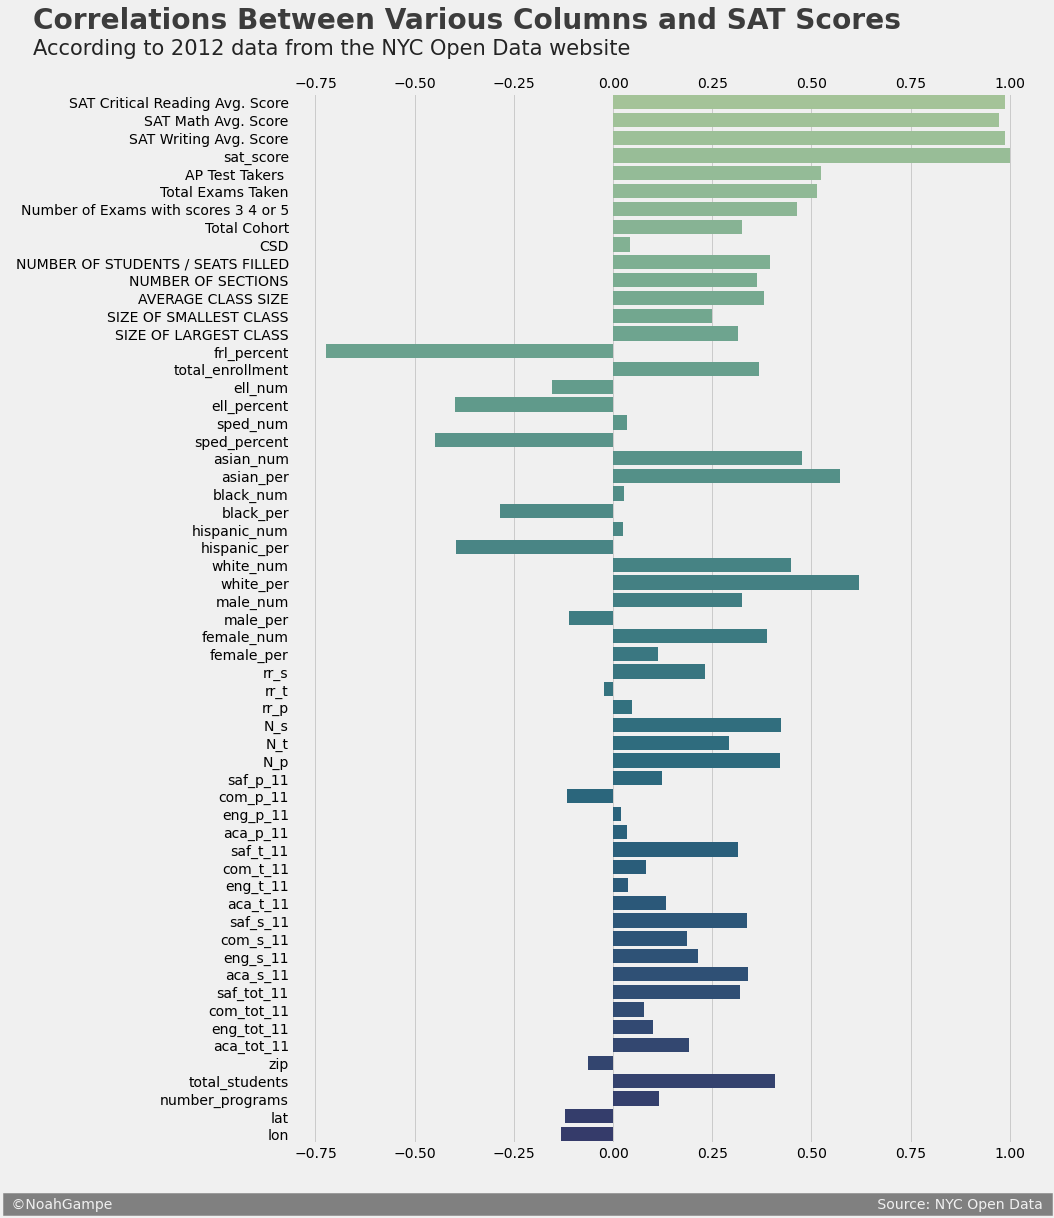

In [35]:
corr_cols = list(correlations.dropna().index)
plot_bar(correlations[corr_cols], corr_cols)

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

* `total_enrollment` has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT. Perhaps the pressure of competition is higher with more students?
* Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
* Both the percentage of females (`female_per`) and number of females (`female_num`) at a school correlate positively with SAT score, whereas the percentage of males (`male_per`) and the number of males (`male_num`) correlate negatively. This could indicate that women do better on the SAT than men.
* Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with sat_score.
* Student ratings of school academic standards (`aca_s_11`) correlate with `sat_score`, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
* There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
* The percentage of English language learners at the school (`ell_percent`, `frl_percent`) has a strong negative correlation with SAT scores.

Since enrollment seems to have such a strong correlation, let's make a scatterplot of `total_enrollment` vs `sat_score`. Each point in the scatterplot represents a high school, so we'll be able to see if there are any interesting patterns. We'll create a helper function to help us visualize our data, since we'll be looking at many scatterplots.

## Helper Functions

In [36]:
def plot_scatter(df, col1, col2, xlabel):
    fig = plt.figure(figsize=(12,8))
    ax = sns.scatterplot(data=df, x=col1, y=col2)
    
    #lines, labels, & limits
    lower_ylim = df[col2].min() * 1.05
    ax.set_ylim(lower_ylim,None)
    ax.set_xlabel(xlabel, labelpad=10)
    ax.set_ylabel('SAT Score', labelpad=10)
    ax.axhline(y=lower_ylim+5, color='black', linewidth=3, alpha=.7)
    ax.tick_params(labelsize=18)
    
    #title & subtitle
    title = f'Relationship - {col1} vs. {col2}'
    sub = 'According to 2012 data from the NYC Open Data website'
    fig.text(-0.005,0.95, s=title, fontsize=28, weight='bold', alpha=.75, transform=fig.transFigure)
    fig.text(-0.005,0.9, s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)
    
    #signature bar
    fig.text(x=-0.01, y=-0.05,
            s=' ©NoahGampe' + ' '*130 + 'Source: NYC Open Data ',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey', transform=fig.transFigure)    
    
    plt.show()

## total_enrollment vs. sat_score

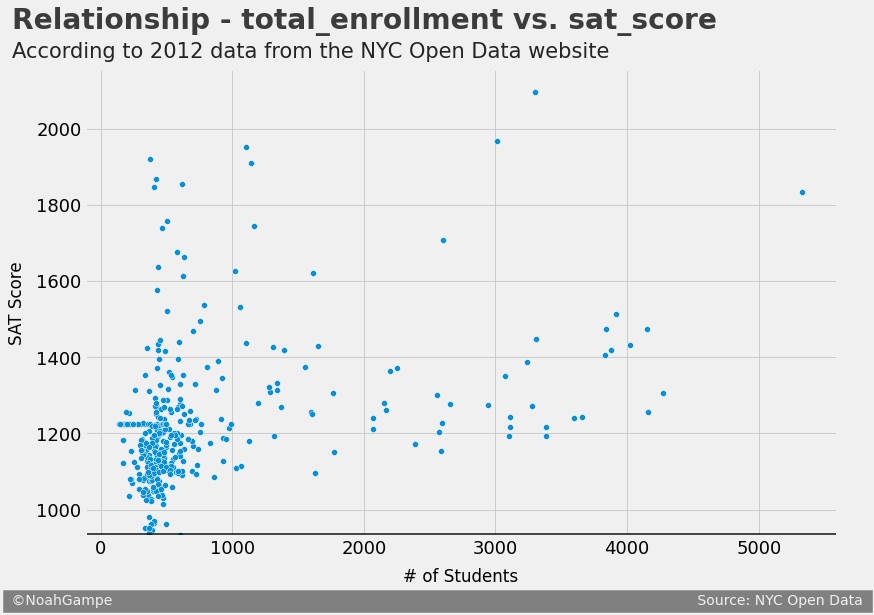

In [37]:
plot_scatter(combined, 'total_enrollment', 'sat_score', '# of Students')

Judging from the plot we just created, it doesn't appear there's a strong correlation between `sat_score` and `total_enrollment`. If there was a strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the `r` value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [38]:
#filters low enrollment & low sat_scores
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = combined[combined["sat_score"] < 1000]
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

We can see that the schools with the lowest `total_enrollment` and lowest `sat_score` are mostly international schools, or schools with high percentages of ESL students. This can indicate that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment` like we initially thought. Let's plot out `ell_percent` vs `sat_score` next.

## ell_percent vs. sat_score

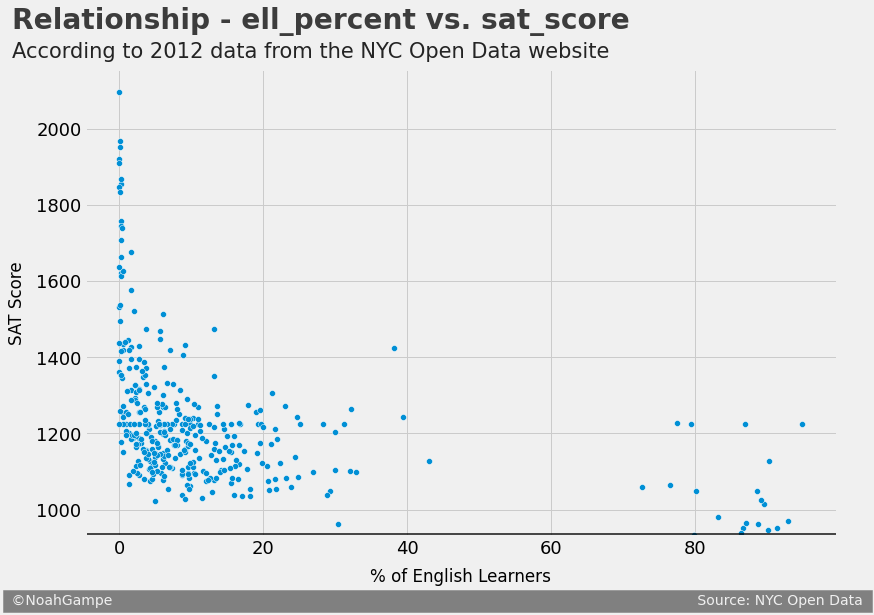

In [39]:
plot_scatter(combined, 'ell_percent', 'sat_score', '% of English Learners')

Here we can clearly see that the more ESL students there are in a high school, the lower the SAT scores. One way to make very granular statistics easier to read is to aggregate them. In this case, we aggregate by district, which enables us to understand how `ell_percent` varies district-by-district instead of the unintelligibly granular school-by-school variation.

In [40]:
#groups by school district, then finds average values for each column
districts = (
    combined.groupby("school_dist")
    .agg(np.mean)
    .reset_index()
)

districts[['school_dist', 'ell_percent', 'sat_score']].sort_values(by='ell_percent', ascending=False).head(10)

,school_dist,ell_percent,sat_score
5,06,30.040000,1164.643881
11,12,27.141667,1101.823134
23,24,21.069231,1242.000000
19,20,20.800000,1273.687761
8,09,19.945000,1131.971940
24,25,19.737500,1357.000000
31,32,18.533333,1119.500000
9,10,18.177273,1222.227273
20,21,17.163636,1206.312619
6,07,16.661538,1128.846154


## Preparing for Further Analysis

We found correlations, created visualizations, and analyzed data district-by-district! Now we have all the tools we need to analyze the data in greater depth.

Along the way, we learned:

* How to find correlations, and what those correlations mean 
* Why we should plot data out, rather than relying on the `r` value alone 
* That `ell_percent` has a strong negative correlation with `sat_score`

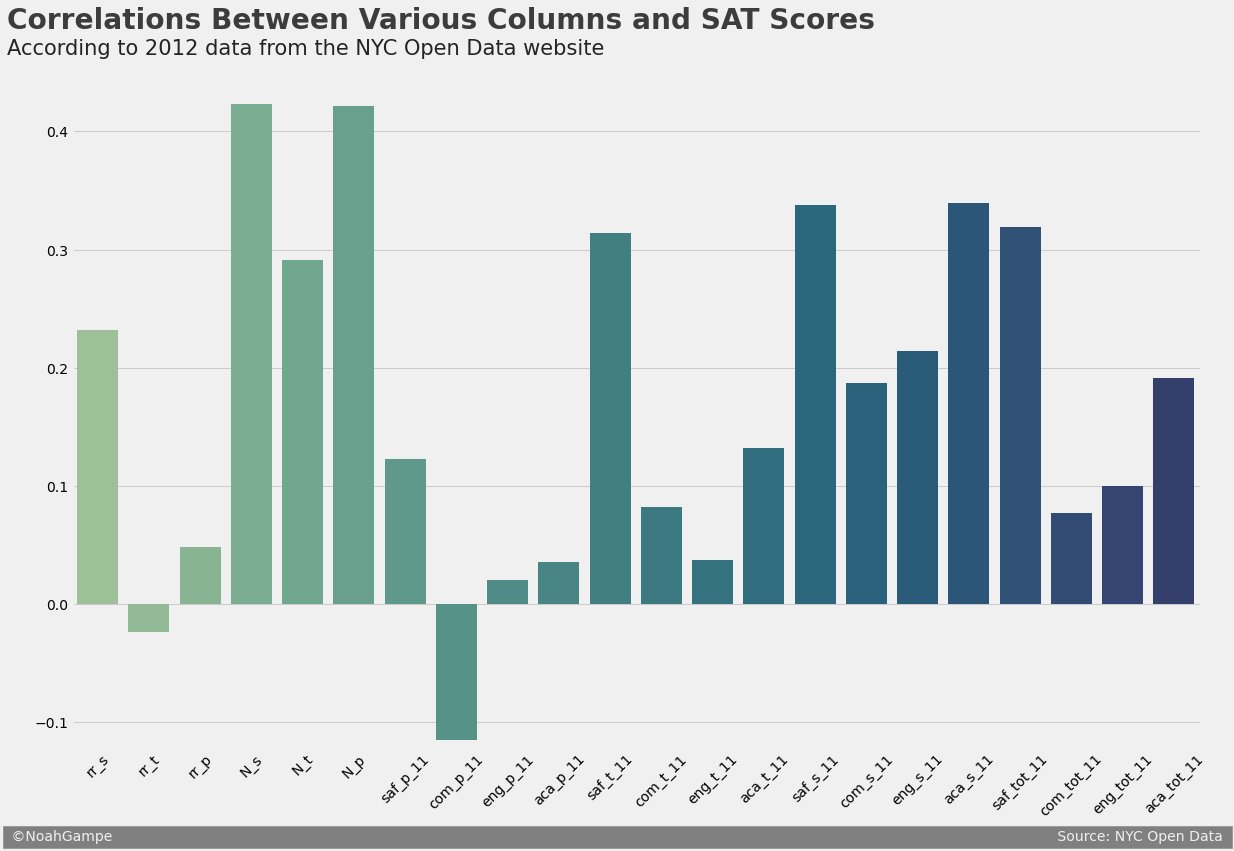

In [41]:
#remove DBN from survey fields because it's a unique identifier - not useful for this
survey_fields.remove("DBN")

plot_bar_v(survey_fields, correlations[survey_fields])

The following are the most notable positive correlations to sat_score:

 * `N_s` - # of student respondents
 * `N_t` - # of teacher respondents
 * `N_p` - # of parent respondents
 * `saf_t_11` - safety and respect score based on teach resonses
 * `saf_s_11` - safety and respect score based on student resonses
 * `aca_s_11` - academic expectations total score based on student responses
 * `saf_tot_11` - safety and respect total score (students, teachers, & parents)
 
It appears that the safer the school, or perhaps the more respectful the school/staff is, the higher the SAT score. This would make sense because its difficult to focus and study if you constantly feel unsafe or uncomfortable. This lines up with the `aca_s_11` - if the students have higher expectations, they're more likely to do well.
 
Also, bases on the responses between parents, teachers, and students, it seems like the higher the students rated the school, the higher their SAT scores were. Interestingly, if we look at the parent responses, the lower the parents rated the school, the lower the scores.

## Safety Scores

According to the above plot, we can see that the perception of safety at school correlates with higher SAT scores. We'll try to find out a bit more information on this by figuring out which schools have low safety scores.

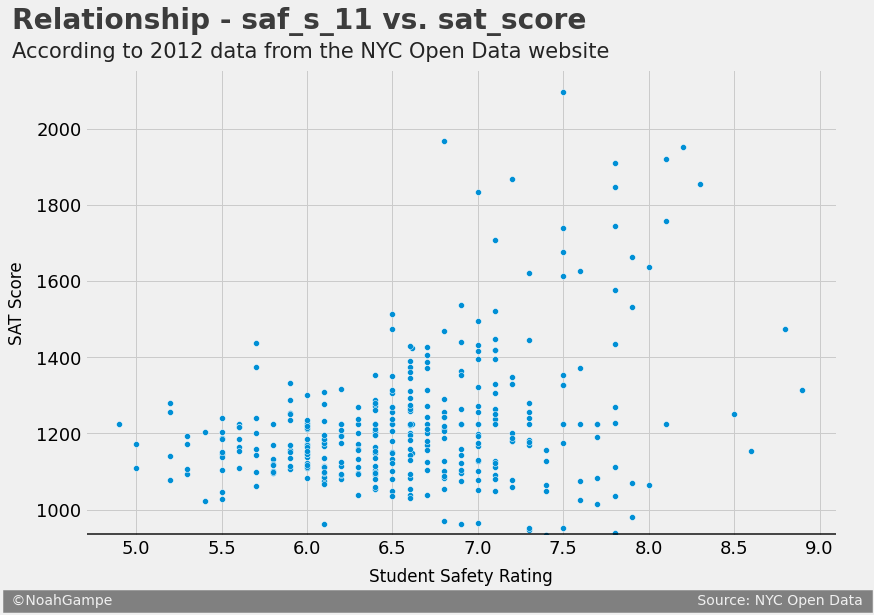

In [42]:
plot_scatter(combined, 'saf_s_11', 'sat_score', 'Student Safety Rating')

It does seem like there's a correlation between safety and higher SAT scores. The safer the school, the higher the score. However, the correlation isn't that strong, as there are some schools with high safety scores, but lower SAT scores, and vice versa.

## Borough Safety Scores

We'll take a look at the individual Boroughs now, to see which are the safest, and to see how the safety of a particular borough may affect scores. After some digging, it turns out there is a borough column - it's called `boro`.

In [43]:
#find average total score per borough
boros_tot = combined.groupby("boro").agg(np.mean)["saf_tot_11"]

#find average student score per borough
boros_s = combined.groupby("boro").agg(np.mean)["saf_s_11"]

print(boros_tot.sort_values(ascending=False), "\n")
print(boros_s.sort_values(ascending=False))

boro
Manhattan        7.473333
Queens           7.387500
Bronx            7.322581
Staten Island    7.200000
Brooklyn         7.129245
Name: saf_tot_11, dtype: float64 

boro
Manhattan        6.831370
Queens           6.721875
Bronx            6.606577
Staten Island    6.530000
Brooklyn         6.370755
Name: saf_s_11, dtype: float64


It looks like Manhattan and Queens have the highest safety scores, with Brooklyn having the lowest.

## Ethnicity vs SAT Score

We have some information in our dataset regarding race percentages:

* `white_per`
* `asian_per`
* `black_per`
* `hispanic_per`

We can plot a graph to see if theres any racial differences in SAT performance.

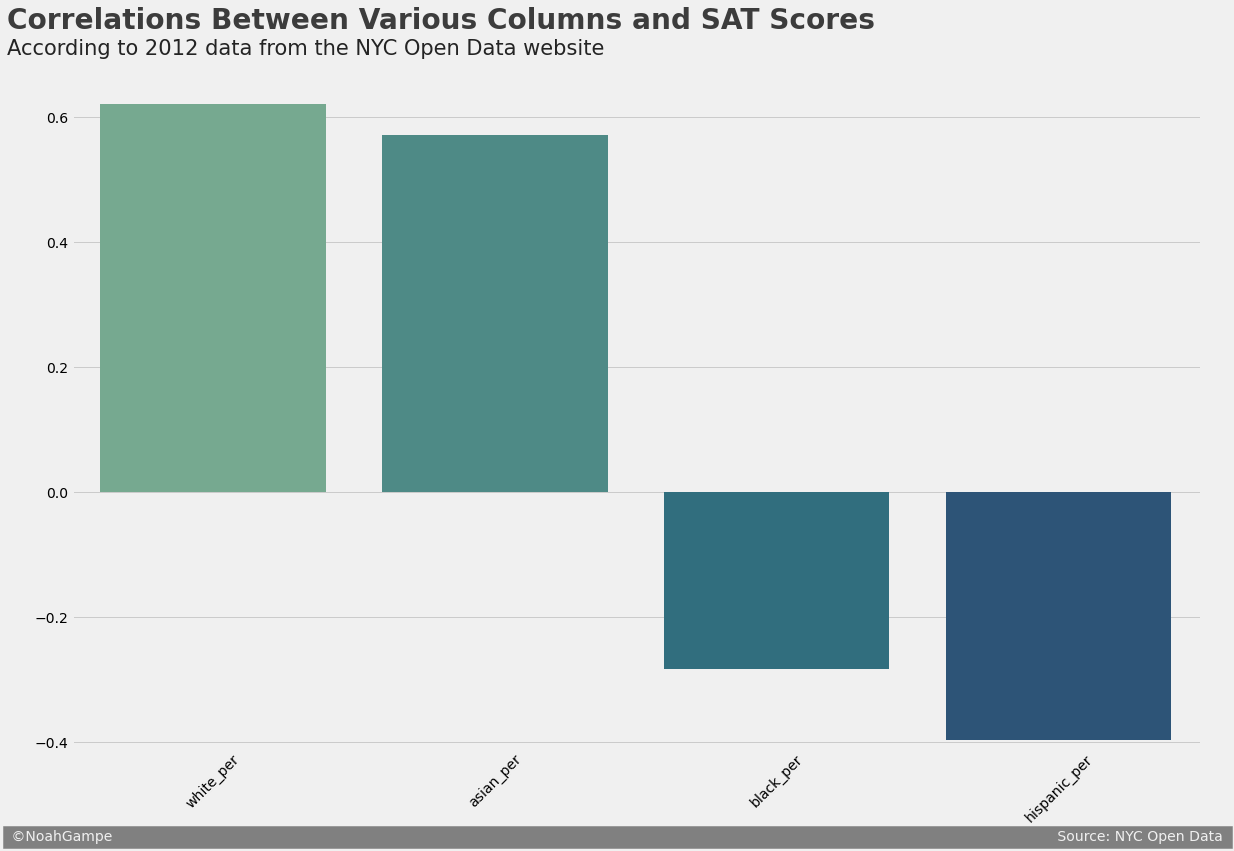

In [44]:
races = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
plot_bar_v(races, correlations[races])

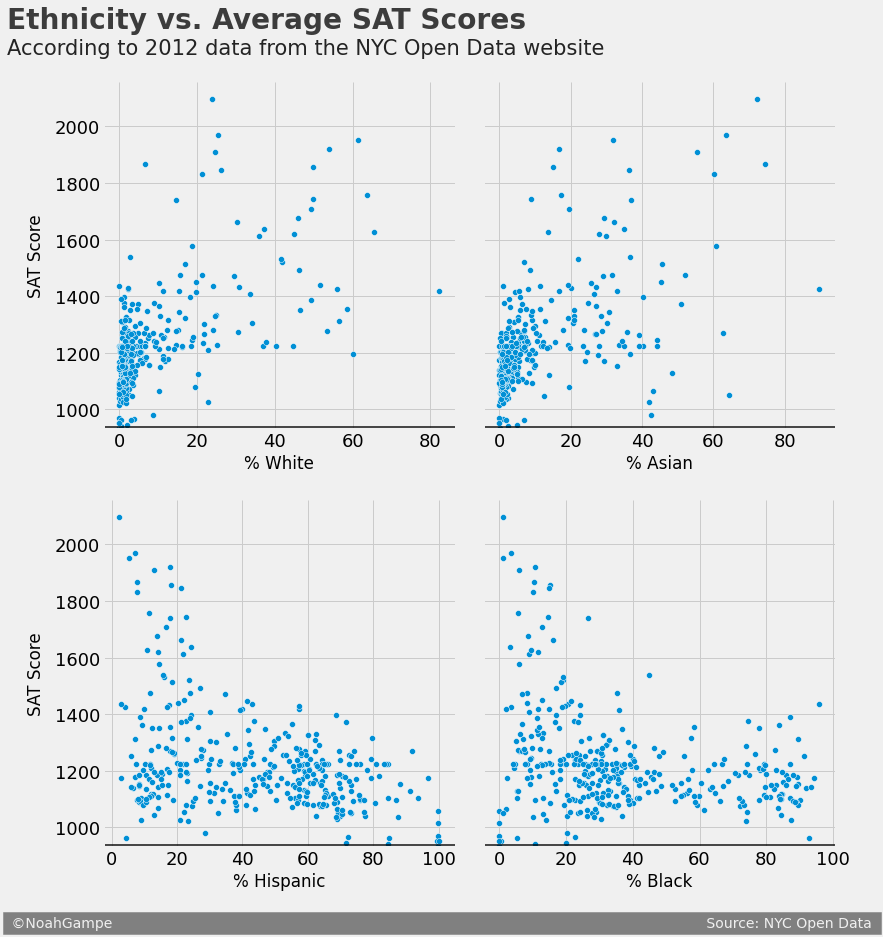

In [45]:
def plot_multi_scatter(df, col1, col2, col3, col4):
    fig = plt.figure(figsize=(12,12))
    cols = [col1, col2, col3, col4]
    labels = ['% White', '% Asian', '% Hispanic', '% Black']
    
    for i, col in enumerate(cols):
        #axes details
        ax = fig.tight_layout(pad = 2, h_pad=2)
        ax = fig.add_subplot(2,2,i+1) #first subplot is 1
        
        #plot
        ax = sns.scatterplot(data=df, x=col, y='sat_score')

        #lines, labels, & limits
        lower_ylim = df['sat_score'].min() * 1.05
        ax.set_ylim(lower_ylim,None)
        ax.set_xlabel(labels[i])
        ax.set_ylabel('SAT Score', labelpad=10)
        ax.axhline(y=lower_ylim+5, color='black', linewidth=3, alpha=.7)
        ax.tick_params(labelsize=18)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if i != 0 and i != 2:
            ax.yaxis.label.set_visible(False)
            ax.tick_params(labelleft=False)
            
    #title & subtitle
    title = f'Ethnicity vs. Average SAT Scores'
    sub = 'According to 2012 data from the NYC Open Data website'
    fig.text(0.01,1.03, s=title, fontsize=28, weight='bold', alpha=.75, transform=fig.transFigure)
    fig.text(0.01,1., s=sub, fontsize=21, alpha=.85, transform=fig.transFigure)

    #signature bar
    fig.text(x=0.01, y=-0.01,
            s=' ©NoahGampe' + ' '*132 + 'Source: NYC Open Data ',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey', transform=fig.transFigure) 
        
    plt.show()
    
plot_multi_scatter(combined, 'white_per', 'asian_per', 'hispanic_per', 'black_per')

We can clearly see that there is a strong correlation between race and SAT scores. White and Asian students tend to do better on the SAT than Black or Hispanic students. This could be an indication of inequality in either the test itself or the quality of education provided to non-white and non-asian students. Historically speaking, the SAT has been looked at as [racist and elitist](https://www.teenvogue.com/story/the-history-of-the-sat-is-mired-in-racism-and-elitism). Many view the test as being [racially biased](https://www.nea.org/advocating-for-change/new-from-nea/racist-beginnings-standardized-testing). Regardless of one's opinions on the matter, it's hard to deny the correlations and numbers we've shown above.

The above scatterplots show us a few things:

* Schools with higher White & Asian populations tend to score higher on the SAT
* Schools with higher Hispanic & Black populatinos tend to score lower on the SAT
* There is no definite pattern or standout correlation between White & Asian populations and the average SAT scores
* There is a much more noticeable relationship with Hispanic & Black student populations. Schools with < 20% Hispanic or Black populations performed considerably higher on the SAT. Schools with < 20% rarely scored above 1400.

If we look at the lower left scatterplot we see schools that have greater than ~30% of hispanic students tend to get no higher than ~1400 on the SAT. Schools that have less than ~30% hispanic students tend to get much higher scores. Schools that are around 100% hispanic tend to have the lowest scores, perhaps due to not as many students taking the SAT.

In [46]:
#find schools that are > 95% hispanic
combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools listed above appear to be geared primarily towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores - especially in the Reading and Writing categories.

In [47]:
#find schools that are < 10% hispanic and have > 1800 sat_score
combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"]

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools that are < 10% Hispanic and have an average SAT score of more than 1800 are all technical or science-based schools. Typically, these types of schools receive of lot of funding, and are a bit more strict on their admissions process. It doesn't necessarily explain the low `hispanic_per`, but it does explain that their students do better on standardized tests.

## Gender vs. SAT Score

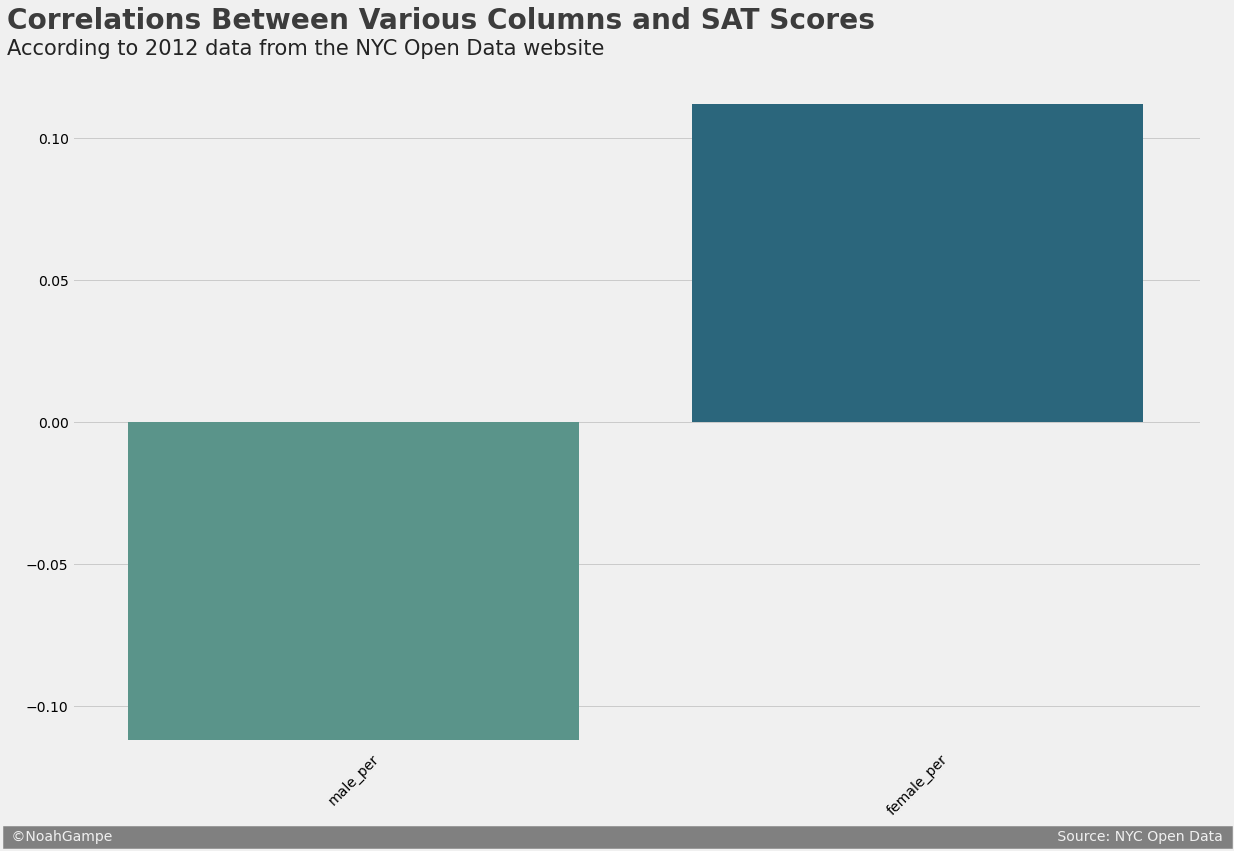

In [48]:
plot_bar_v(['male_per', 'female_per'], correlations[['male_per', 'female_per']])

Our initial looks shows that females have positive correlation with `sat_scores` while males have a negative correlation. Neither correlation is that strong however, with both having an `r` value of ~+/-0.11.

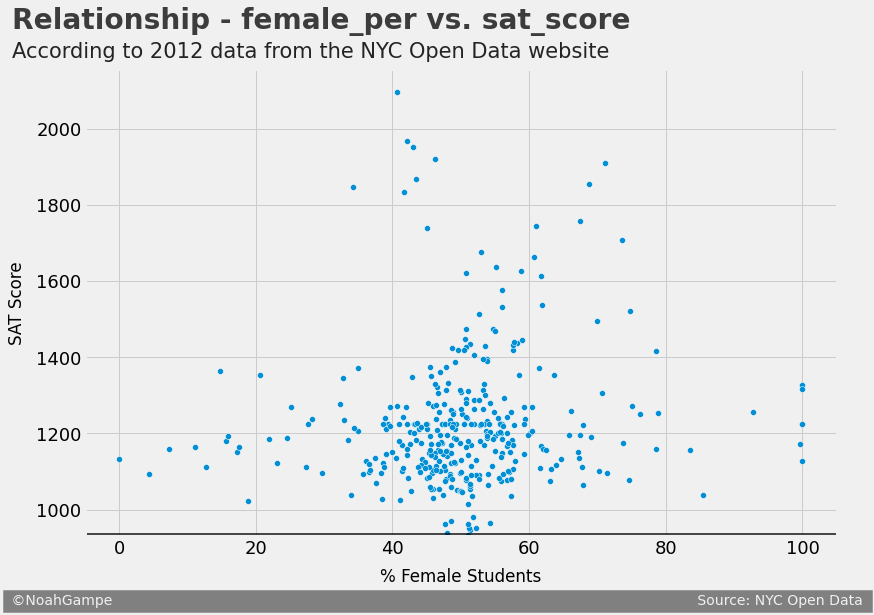

In [49]:
plot_scatter(combined, 'female_per', 'sat_score', '% Female Students')

There isn't a strong correlation between sat_score and female_per. Interestingly though, there are several schools that are between 60-80% female that have higher SAT scores. Most schools with either < 30% or > 80% female population tend to not get higher than 1400 on the SAT.

In [50]:
#find schools with >60% female population AND sat_score > 1700
combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

The schools with higher female population and higher SAT scores are well-funded high schools with a focus on college-prep and liberal arts.

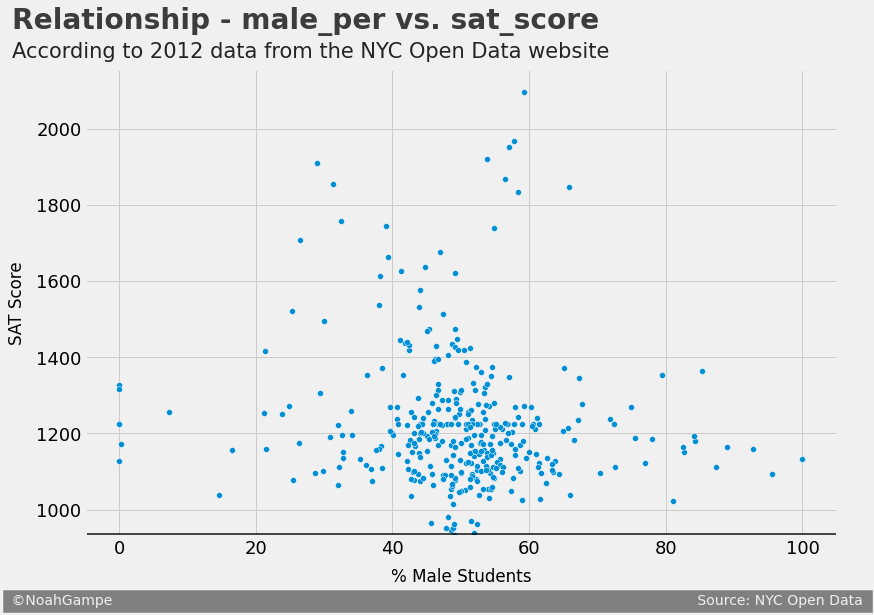

In [51]:
plot_scatter(combined, 'male_per', 'sat_score', '% Male Students')

Again, we don't see a very strong correlation here. Schools with <25% or >70% male population tend to score below 1400 on the SAT.

## AP Students vs. SAT Scores

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Because total_enrollment is highly correlated with sat_scores, we don't want to lead to bias results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

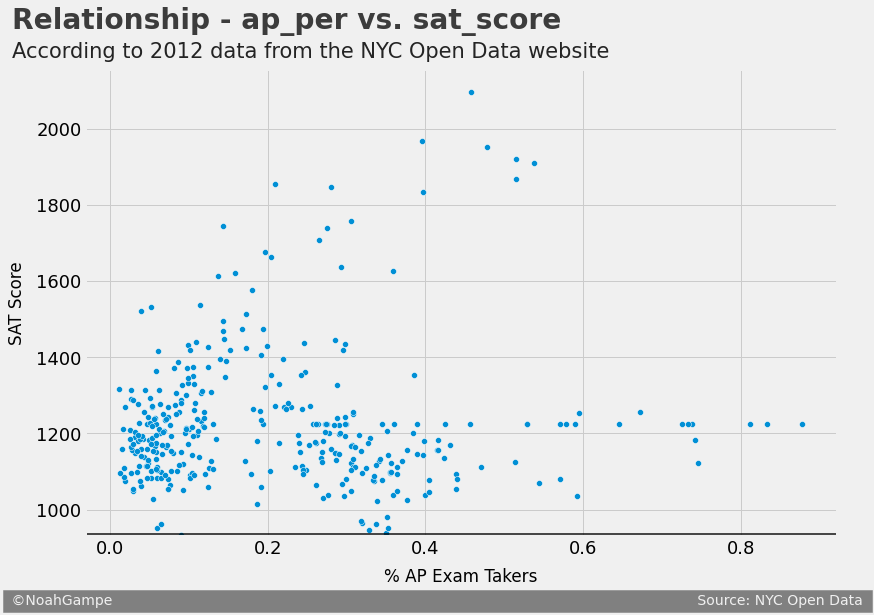

In [52]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]
plot_scatter(combined, 'ap_per', 'sat_score', '% AP Exam Takers')

It does seem like there's a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores - however, it's not a very strong correlation. If ~20-40% of a school's student body takes AP exams, they score higher on the SAT.

## Class Size vs. SAT Scores

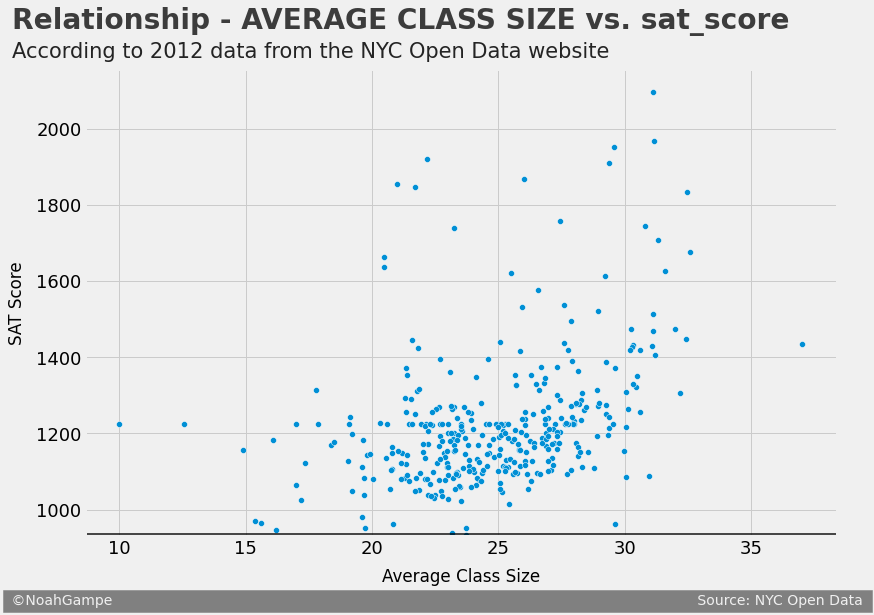

In [53]:
plot_scatter(combined, 'AVERAGE CLASS SIZE', 'sat_score', 'Average Class Size')

It seems like the bigger the class, the higher the SAT scores. Though it seems like the "sweet spot" would be between 25-32 students.

# Conclusion

We have combined multiple datasets into one big dataset, and performed some exploratory data analysis on it. In our analysis we have seen that there is in fact some correlation between the SAT scores and the demographics of the student body. Some of the bigger takeaways are:

* Hispanic & Black students tend to score lower on the SAT, while White & Asian students tend to score higher.
* Schools with more ESL students tends to score lower on the SAT.
* The perceived safety of the school has an effect on SAT scores - the more safe a student feels the school is, the better the SAT score.
* Schools with better funding and fewer immigrant students perform better on the SAT.

While it's very difficult to make a direct 1-to-1 comparison between U.S. high school students and South Korean high school students, I think it's fair to say that the diversity in America has a big impact on standardized testing. We have seen that language barriers can severely impact the average SAT school for a high school. That is something that isn't an issue in Korea, where [almost 98%](https://sites.miis.edu/southkoreaeducation/diversity-and-access/#:~:text=This%20progress%20did%20not%20stop,who%20can%20read%20and%20write.) of its population is literate. There also wouldn't be any kind of bias towards or against any one ethnicity in Korean high schools since South Korea is roughly [99% homogeneous](https://worldpopulationreview.com/countries/south-korea-population).

This project has been a great example of how to not only clean, combine, and analyze data, but also how to draw conclusions from it. As a former teacher this has been very insightful. I hope moving forward more and more universities ease the restrictions on college admissions, thereby lowering the bar for entry and allowing more students a fair chance at higher education.